# Testing Various Machine Learning Models

I would like to create model that can identify individuals at the greatest risk of injury three months prior to when it occurs. In order to do this, I will first complete feature selection using a step-forward approach to optimize recall. Then I will complete some basic EDA. How imablaneced is the data? Are the features selected correlated? Next, I tested various machine learnign models and balenced thate data using to oversampling

In [1]:
# Machine Learning Model Tests
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
######FINAL COPY
# ML 2010
# Reading in the pachages used for this part of analysis
import pandas as pd
import numpy as np
from numpy import cov
from scipy.stats import pearsonr
from datetime import date
import datetime
from dateutil.relativedelta import relativedelta
from dateutil import parser
from collections import Counter
from datetime import datetime
from dateutil.parser import parse
import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from dateutil import parser
import random
import os
import os.path
from collections import Counter
import sklearn

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

from xgboost import XGBClassifier

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import ADASYN 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pickle
from sklearn import preprocessing


<IPython.core.display.Javascript object>

In [3]:
# Change the Working Directory
os.chdir("/Users/Owner/Desktop/InsightFellows/Daniella_Patton_Insight_Project/Raw_Data")
print(os.getcwd())  # Prints the current working directory
ml_table2010 = pd.read_csv("ML_filtered_career.csv")

/Users/Owner/Desktop/InsightFellows/Daniella_Patton_Insight_Project/Raw_Data


/Users/Owner/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10,22,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<IPython.core.display.Javascript object>

In [4]:
ml_table2010.head()


def ratio(ml_table2010):
    if ml_table2010.Month1DoublesMathces == 0:
        x = ml_table2010.Month1SinglesMathces
    else:
        x = ml_table2010.Month1SinglesMathces / ml_table2010.Month1DoublesMathces
    return x

<IPython.core.display.Javascript object>

In [5]:
# Hard Code in Yes or No for injury type
ml_table2010["Injured"] = ml_table2010["Injured"].replace("Y", 1)
ml_table2010["Injured"] = ml_table2010["Injured"].replace("N", 0)
# Hard Code in
ml_table2010["Month1Injured"] = ml_table2010["Month1Injured"].replace("Y", 1)
ml_table2010["Month1Injured"] = ml_table2010["Month1Injured"].replace("N", 0)
# Hard Code in
ml_table2010["Month3Injured"] = ml_table2010["Month3Injured"].replace("Y", 1)
ml_table2010["Month3Injured"] = ml_table2010["Month3Injured"].replace("N", 0)
# Hard Code in
ml_table2010["Month6Injured"] = ml_table2010["Month6Injured"].replace("Y", 1)
ml_table2010["Month6Injured"] = ml_table2010["Month6Injured"].replace("N", 0)
# Hard Code in
ml_table2010["CumInjured"] = ml_table2010["CumInjured"].replace("Y", 1)
ml_table2010["CumInjured"] = ml_table2010["CumInjured"].replace("N", 0)

<IPython.core.display.Javascript object>

In [6]:
# GET DUMMIES FOR THE REST
# Drop the name
ml_table2010 = pd.get_dummies(
    ml_table2010,
    columns=[
        "Country",
        "Month1InjuredType",
        "Month3InjuredType",
        "Month6InjuredType",
        "CumInjuredType",
    ],
)

<IPython.core.display.Javascript object>

In [7]:
ml_table2010 = ml_table2010.drop(["EndDate"], axis=1)
ml_table2010.dtypes

StartDate                      object
PlayerName                     object
Age                             int64
Injured                         int64
Singles_Ranking               float64
                               ...   
Month6InjuredType_Moderate      uint8
Month6InjuredType_Severe        uint8
CumInjuredType_Mild             uint8
CumInjuredType_Moderate         uint8
CumInjuredType_Severe           uint8
Length: 116, dtype: object

<IPython.core.display.Javascript object>

In [8]:
# Getting all of the data in the collumn filtered by startdate so
ml_table2010["StartDate"] = ml_table2010["StartDate"].apply(
    lambda x: parser.parse(x).date()
)

<IPython.core.display.Javascript object>

0    13687
1     2698
Name: Injured, dtype: int64
0.19712135603127054


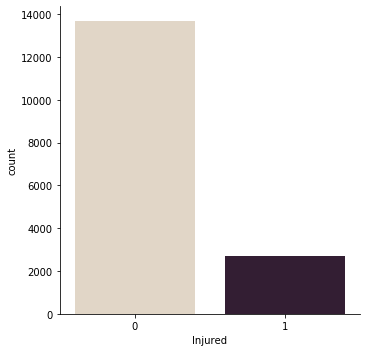

<IPython.core.display.Javascript object>

In [9]:
# Chacked for Unbalenced Classes
sns.catplot(x="Injured", kind="count", palette="ch:.25", data=ml_table2010)
print(ml_table2010["Injured"].value_counts())
print(2698 / 13687)

In [10]:
# Use 2010 - 2018 data to train
Training = ml_table2010[ml_table2010["StartDate"] < datetime.date(2018, 1, 1)]
X_train = Training.drop(["Injured", "StartDate", "PlayerName"], axis=1)
Y_train = Training["Injured"]

# Use 2019 data to test how accurate the model predictions are
# Testing Set
Testing = ml_table2010[
    (ml_table2010["StartDate"] >= datetime.date(2018, 1, 1))
    & (ml_table2010["StartDate"] < datetime.date(2019, 6, 1))
]
X_test = Testing.drop(["Injured", "StartDate", "PlayerName"], axis=1)
Y_test = Testing["Injured"]

<IPython.core.display.Javascript object>

In [11]:
ml_table2010.head()

,StartDate,PlayerName,Age,Injured,Singles_Ranking,Doubles_Ranking,Month1Injured,Month1TimeInjured,Month1GamesPlayed,Month1MatchesPlayed,...,Month1InjuredType_Severe,Month3InjuredType_Mild,Month3InjuredType_Moderate,Month3InjuredType_Severe,Month6InjuredType_Mild,Month6InjuredType_Moderate,Month6InjuredType_Severe,CumInjuredType_Mild,CumInjuredType_Moderate,CumInjuredType_Severe
0,2010-04-01,Ashleigh Barty,13,0,175.0,13.0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,2010-07-01,Ashleigh Barty,14,0,175.0,13.0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,2010-10-01,Ashleigh Barty,14,0,175.0,13.0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,2011-01-01,Ashleigh Barty,14,0,500.0,45.0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,2011-04-01,Ashleigh Barty,14,0,500.0,45.0,0,0,47.0,2,...,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [12]:
# keep last duplicate value
df = ml_table2010.drop_duplicates(subset=["PlayerName"], keep="last")

csv_for_webapp = df[
    [
        "PlayerName",
        "Month1Carpet",
        "CumInjured",
        "CumInjuredTimes",
        "CumInjuredGames",
        "Country_Argentina",
        "Country_Australia",
        "Country_Austria",
        "Country_Belarus",
        "Country_Brazil",
        "Country_Colombia",
        "Country_Egypt",
        "Country_Estonia",
        "Country_Israel",
        "Country_Kazakhstan",
        "Country_Latvia",
        "Country_Romania",
        "Country_Russia",
        "Country_Serbia",
        "Country_South Korea",
        "Country_Sweden",
        "Country_Switzerland",
        "Country_Thailand",
        "Country_Venezuela",
        "Month1InjuredType_Severe",
        "CumInjuredType_Moderate",
    ]
].copy()

<IPython.core.display.Javascript object>

In [13]:
csv_for_webapp.head()
csv_for_webapp.to_csv("Current_Player_Info.csv")

<IPython.core.display.Javascript object>

# First Pass Random Forest with unbalenced data for model selections

In [14]:
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import KFold  # import KFold
from imblearn.over_sampling import SMOTE

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score

# Build RF classifier to use in feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

<IPython.core.display.Javascript object>

In [15]:
# First Pass Random Forest
rf = RandomForestClassifier()

rf.fit(X_train, Y_train)

y_pred = rf.predict(X_test)
y_pred = pd.Series(y_pred)
# Train the model on training data
cm = confusion_matrix(Y_test, y_pred)
print(cm)

# First pass run is not awful, but courld use improvement and hyperperamter model
# optimization
print("Accuracy of random forest on test set: {:.2f}".format(rf.score(X_test, Y_test)))
print("Precision:", metrics.precision_score(Y_test, y_pred))
print("Recall:", metrics.recall_score(Y_test, y_pred))
print("F1:", metrics.f1_score(Y_test, y_pred))

[[1775   15]
 [ 394   10]]
Accuracy of random forest on test set: 0.81
Precision: 0.4
Recall: 0.024752475247524754
F1: 0.046620046620046623


<IPython.core.display.Javascript object>

In [47]:
# Step Foward for Precision
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
#clf = LogisticRegression(solver='liblinear', max_iter=1, class_weight='balanced')
# Build step forward feature selection
sfs = sfs(clf,
           k_features=25,
           forward=True,
           floating=False,
           verbose=2,
           scoring='recall',
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 113 out of 113 | elapsed:  3.6min finished

[2020-02-06 11:56:02] Features: 1/15 -- score: 0.12790608469148354[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 112 out of 112 | elapsed: 10.4min finished

[2020-02-06 12:06:25] Features: 2/15 -- score: 0.19121684909144435[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 111 out of 111 | elapsed:  8.0min finished

[2020-02-06 12:14:24] Features: 3/15 -- score: 0.20472966342851534[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

In [16]:
# Which features?
feat_cols = list(sfs1.k_feature_idx_)
# Random Forest Classifired Index [37, 38, 47, 49, 51, 74, 84, 92, 96, 110]
# Logistic Regression Index [10, 37, 38, 48, 56, 73, 75, 77, 84, 85, 92, 93, 98, 104, 111]

NameError: name 'sfs1' is not defined

<IPython.core.display.Javascript object>

In [17]:
X_train.head(20)
# colnames = X_train.columns[feat_cols]
# print(colnames)


# X_train.head()

# X_train = X_train[colnames]
# X_test = X_test[colnames]

X_train = X_train[
    [
        "Month1GamesPlayed",
        "Month1Carpet",
        "CumInjured",
        "CumInjuredTimes",
        "CumInjuredGames",
        "Country_Argentina",
        "Country_Australia",
        "Country_Austria",
        "Country_Belarus",
        "Country_Brazil",
        "Country_Colombia",
        "Country_Egypt",
        "Country_Estonia",
        "Country_Israel",
        "Country_Kazakhstan",
        "Country_Latvia",
        "Country_Romania",
        "Country_Russia",
        "Country_Serbia",
        "Country_South Korea",
        "Country_Sweden",
        "Country_Switzerland",
        "Country_Thailand",
        "Country_Venezuela",
        "Month1InjuredType_Severe",
        "CumInjuredType_Moderate",
    ]
]


X_test = X_test[
    [
        "Month1GamesPlayed",
        "Month1Carpet",
        "CumInjured",
        "CumInjuredTimes",
        "CumInjuredGames",
        "Country_Argentina",
        "Country_Australia",
        "Country_Austria",
        "Country_Belarus",
        "Country_Brazil",
        "Country_Colombia",
        "Country_Egypt",
        "Country_Estonia",
        "Country_Israel",
        "Country_Kazakhstan",
        "Country_Latvia",
        "Country_Romania",
        "Country_Russia",
        "Country_Serbia",
        "Country_South Korea",
        "Country_Sweden",
        "Country_Switzerland",
        "Country_Thailand",
        "Country_Venezuela",
        "Month1InjuredType_Severe",
        "CumInjuredType_Moderate",
    ]
]

<IPython.core.display.Javascript object>

In [18]:
# Instantiate model with 1000 decision trees
# Imporvement to model, so using these variable movni foward
rf = RandomForestClassifier(class_weight="balanced")
rf.fit(X_train, Y_train)

y_pred = rf.predict(X_test)
y_pred = pd.Series(y_pred)
# Train the model on training data
cm = confusion_matrix(Y_test, y_pred)
print(cm)

# First pass run is not awful, but courld use improvement and hyperperamter model
# optimization
print("Accuracy of random forest on test set: {:.2f}".format(rf.score(X_test, Y_test)))
print("Precision:", metrics.precision_score(Y_test, y_pred))
print("Recall:", metrics.recall_score(Y_test, y_pred))
print("F1:", metrics.f1_score(Y_test, y_pred))

[[1694   96]
 [ 372   32]]
Accuracy of random forest on test set: 0.79
Precision: 0.25
Recall: 0.07920792079207921
F1: 0.12030075187969924


<IPython.core.display.Javascript object>

In [19]:
# Corr Matrix test
corr_mt = X_train.copy()
corr_mt["Injured"] = Y_train

<IPython.core.display.Javascript object>

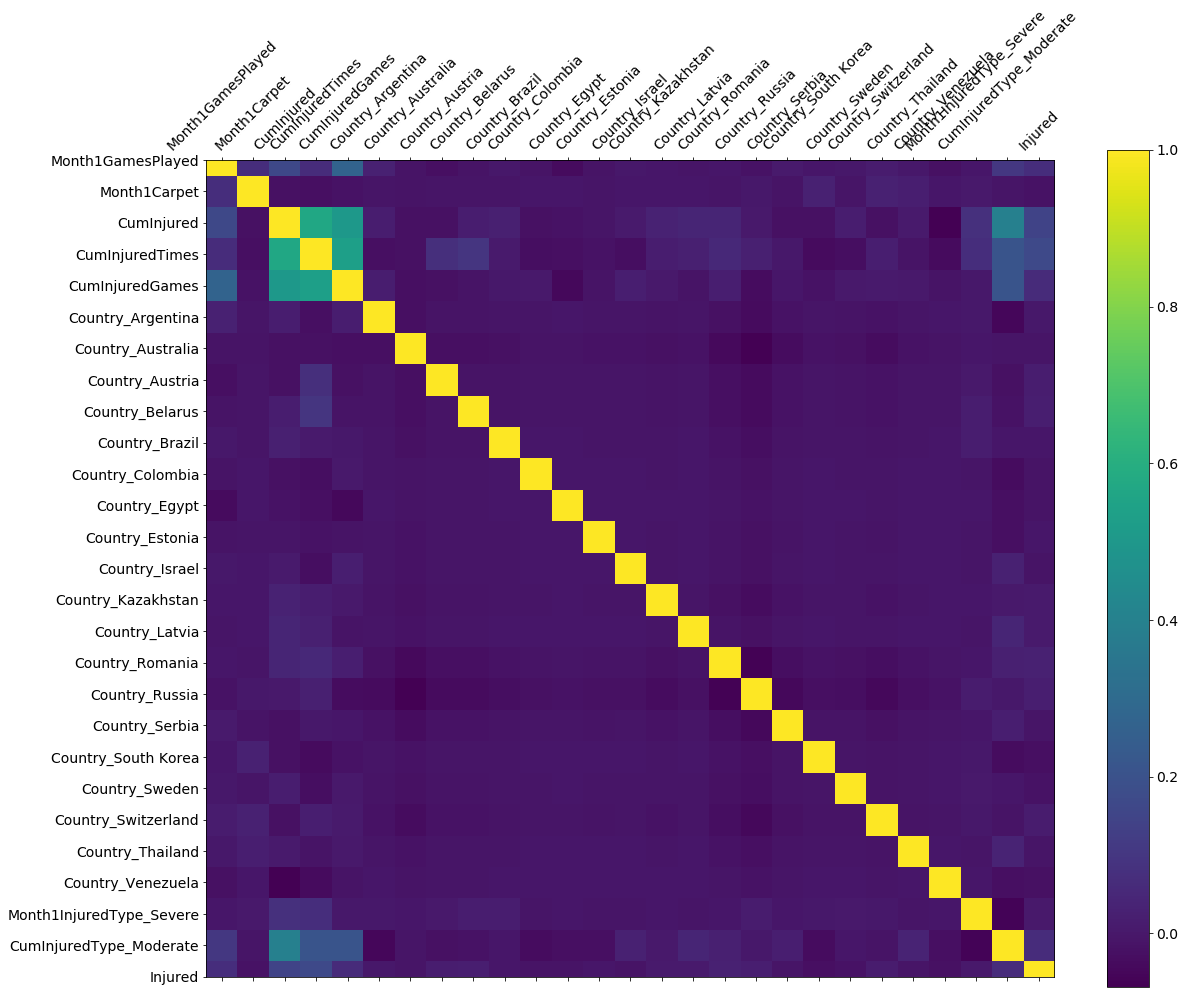

<IPython.core.display.Javascript object>

In [20]:
# Need to Look at correlation matrix and remove highly correlated variables in the
# order of most important variabes

f = plt.figure(figsize=(19, 15))
plt.matshow(corr_mt.corr(), fignum=f.number)
plt.xticks(range(corr_mt.shape[1]), corr_mt.columns, fontsize=14, rotation=45)
plt.yticks(range(corr_mt.shape[1]), corr_mt.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [ ]:
# prepare configuration for cross validation test harness
seed = 7
kfold = 5
# Ratio of injured to non-injured 
# 2682/13580 = 0.2 (5 x)

# prepare models
models = []
models.append(('LR', LogisticRegression(solver='liblinear', max_iter=100, class_weight='balanced')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(class_weight='balanced')))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(class_weight='balanced')))
models.append(('RF', RandomForestClassifier(class_weight='balanced')))
models.append(('XGBoost', XGBClassifier(scale_pos_weight=4)))

# evaluate each model in turn
results = []
names = []
scoring='f1'

print('The results with balanced-weighting')
for name, model in models:
    kfold = model_selection.KFold(n_splits=5)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGBoost', XGBClassifier()))

    
print('The results with balanced data using SMOTE')
results_SMOTE = []
names_SMOTE = []

for name, model in models:   
    kfold = model_selection.KFold(n_splits=5)
    imba_pipeline = make_pipeline(SMOTE(random_state=42), model)
    cv_results = cross_val_score(imba_pipeline, X_train, Y_train, scoring= scoring, cv=kfold)
    results_SMOTE.append(cv_results)
    names_SMOTE.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


print('The results with balanced data using ADASYN')
results_ADASYN = []
names_ADASYN = []

for name, model in models:   
    kfold = model_selection.KFold(n_splits=5)
    imba_pipeline = make_pipeline(ADASYN(random_state=42), model)
    cv_results = cross_val_score(imba_pipeline, X_train, Y_train, scoring= scoring, cv=kfold)
    results_ADASYN.append(cv_results)
    names_ADASYN.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

In [22]:
X_scaled = preprocessing.scale(X_train)

# prepare models
models = []
models.append(
    (
        "LR",
        LogisticRegression(solver="liblinear", max_iter=100, class_weight="balanced"),
    )
)
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier(class_weight="balanced")))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC(class_weight="balanced")))
models.append(("RF", RandomForestClassifier(class_weight="balanced")))
models.append(("XGBoost", XGBClassifier(scale_pos_weight=4)))

# evaluate each model in turn
results = []
names = []
scoring = "f1"

print("The results with balanced-weighting")
for name, model in models:
    kfold = model_selection.KFold(n_splits=5)
    cv_results = model_selection.cross_val_score(
        model, X_scaled, Y_train, cv=kfold, scoring=scoring
    )
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


"""
The results with balanced-weighting
LR: 0.335936 (0.007798)
LDA: 0.061024 (0.037630)
KNN: 0.152377 (0.031906)
CART: 0.223875 (0.018499)
NB: 0.285749 (0.012118)
SVM: 0.329350 (0.012078)
RF: 0.237863 (0.016613)
XGBoost: 0.329015 (0.014148)
"""

The results with balanced-weighting
LR: 0.338619 (0.008997)
LDA: 0.072454 (0.035208)


KeyboardInterrupt: 

<IPython.core.display.Javascript object>

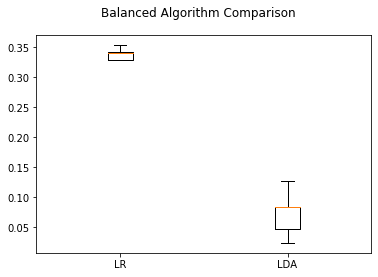

<IPython.core.display.Javascript object>

In [23]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle("Balanced Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

IndexError: list index out of range

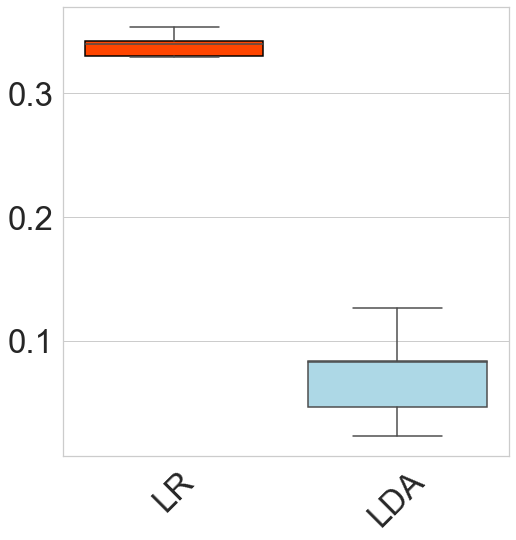

<IPython.core.display.Javascript object>

In [24]:
sns.set(font_scale=3)
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(8, 8.27))

tips = sns.load_dataset("tips")
ax = sns.boxplot(x=names, y=results)

plt.xticks(rotation=45)

# Select which box you want to change
mybox = ax.artists[0]

# Change the appearance of that box
mybox.set_facecolor("orangered")
mybox.set_edgecolor("black")
# mybox.set_linewidth(3)


mybox = ax.artists[1]
mybox.set_facecolor("lightblue")
mybox = ax.artists[2]
mybox.set_facecolor("lightblue")
mybox = ax.artists[3]
mybox.set_facecolor("lightblue")
mybox = ax.artists[4]
mybox.set_facecolor("lightblue")
mybox = ax.artists[5]
mybox.set_facecolor("lightblue")
mybox = ax.artists[6]
mybox.set_facecolor("lightblue")
mybox = ax.artists[7]
mybox.set_facecolor("lightblue")

NameError: name 'names_SMOTE' is not defined

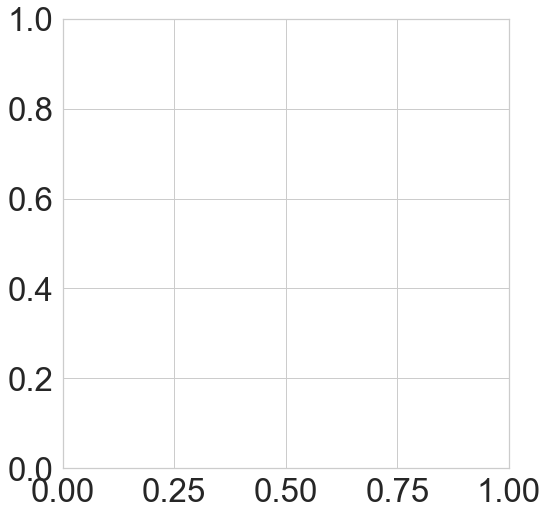

<IPython.core.display.Javascript object>

In [33]:
# boxplot algorithm comparison


sns.set(font_scale=3)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 8.27))


tips = sns.load_dataset("tips")
ax = sns.boxplot(x=names_SMOTE, y=results_SMOTE)

plt.xticks(rotation=45)

# fig = plt.figure()
# fig.suptitle('SMOTE Algorithm Comparison')
# ax = fig.add_subplot(111)
# plt.boxplot(results_SMOTE)
# ax.set_xticklabels(names_SMOTE)
plt.show()

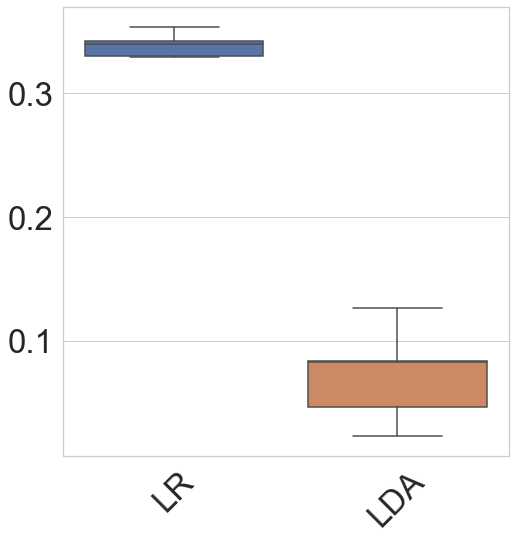

<IPython.core.display.Javascript object>

In [34]:
# boxplot algorithm comparison
sns.set(font_scale=3)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 8.27))

tips = sns.load_dataset("tips")
ax = sns.boxplot(x=names, y=results)
plt.xticks(rotation=45)
# Select which box you want to change
mybox = ax.artists[0]


# fig = plt.figure()
# fig.suptitle('ADYSONs Algorithm Comparison')
# ax = fig.add_subplot(111)
# plt.boxplot(results_ADASYN)
# ax.set_xticklabels(names_ADASYN)
# plt.show()

In [35]:
rf = LogisticRegression(class_weight="balanced")

rf.fit(X_train, Y_train)

y_pred = rf.predict(X_test)
y_pred = pd.Series(y_pred)
# Train the model on training data
cm = confusion_matrix(Y_test, y_pred)
print(cm)

# First pass run is not awful, but courld use improvement and hyperperamter model
# optimization
print("Accuracy of random forest on test set: {:.2f}".format(rf.score(X_test, Y_test)))
print("Precision:", metrics.precision_score(Y_test, y_pred))
print("Recall:", metrics.recall_score(Y_test, y_pred))
print("F1:", metrics.f1_score(Y_test, y_pred))

[[910 880]
 [116 288]]
Accuracy of random forest on test set: 0.55
Precision: 0.2465753424657534
Recall: 0.7128712871287128
F1: 0.366412213740458


/Users/Owner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<IPython.core.display.Javascript object>

In [36]:
from sklearn.model_selection import GridSearchCV

# Create logistic regression
logistic = linear_model.LogisticRegression(
    solver="liblinear", max_iter=1000, class_weight="balanced"
)
# Create regularization penalty space
penalty = ["l1", "l2"]
# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)
# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)
# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
# Fit grid search
best_model = clf.fit(X_train, Y_train)
# View best hyperparameters
print("Best Penalty:", best_model.best_estimator_.get_params()["penalty"])
print("Best C:", best_model.best_estimator_.get_params()["C"])
# Predict target vector
y_pred = best_model.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print(cm)


# First pass run is not awful, but courld use improvement and hyperperamter model
# optimization
print(
    "Accuracy of random forest on test set: {:.2f}".format(
        best_model.score(X_test, Y_test)
    )
)
print("Precision:", metrics.precision_score(Y_test, y_pred))
print("F1:", metrics.f1_score(Y_test, y_pred))
print("Recall:", metrics.recall_score(Y_test, y_pred))

Best Penalty: l2
Best C: 21.544346900318832
[[917 873]
 [117 287]]
Accuracy of random forest on test set: 0.55
Precision: 0.24741379310344827
F1: 0.36700767263427114
Recall: 0.7103960396039604


<IPython.core.display.Javascript object>

In [37]:
# Best Penalty: l2 Best C: 1.0
logistic = linear_model.LogisticRegression(
    solver="liblinear", max_iter=1000, class_weight="balanced", penalty="l2"
)

logistic.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

<IPython.core.display.Javascript object>

In [38]:
X_tester = X_test.iloc[
    0:,
]

<IPython.core.display.Javascript object>

In [29]:
X_tester

,Month1GamesPlayed,Month1Carpet,CumInjured,CumInjuredTimes,CumInjuredGames,Country_Argentina,Country_Australia,Country_Austria,Country_Belarus,Country_Brazil,...,Country_Romania,Country_Russia,Country_Serbia,Country_South Korea,Country_Sweden,Country_Switzerland,Country_Thailand,Country_Venezuela,Month1InjuredType_Severe,CumInjuredType_Moderate
31,0.0,0,1,4,8267.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32,189.0,0,1,4,8805.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,211.0,0,1,5,9506.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,296.0,0,1,5,10265.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,16.0,0,1,5,10411.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16342,0.0,0,1,1,2271.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16343,0.0,0,1,1,2271.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16344,0.0,0,1,1,2271.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16345,0.0,0,1,1,2271.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [30]:
logistic.predict(X_tester)

array([0, 1, 1, ..., 0, 0, 0])

<IPython.core.display.Javascript object>

In [31]:
filename = "logistic_model.sav"
pickle.dump(logistic, open(filename, "wb"))

NameError: name 'pickle' is not defined

<IPython.core.display.Javascript object>

In [39]:
coeff_list = logistic.coef_
coeff_list
# Absolute or Square
# Standardized B coefficients
x = np.std(X_train, 0)
print(np.std(X_train, 0))

Month1GamesPlayed             97.512333
Month1Carpet                   0.414798
CumInjured                     0.478958
CumInjuredTimes                3.324430
CumInjuredGames             3747.207088
Country_Argentina              0.111580
Country_Australia              0.204882
Country_Austria                0.115169
Country_Belarus                0.115169
Country_Brazil                 0.084641
Country_Colombia               0.060894
Country_Egypt                  0.048468
Country_Estonia                0.069011
Country_Israel                 0.065658
Country_Kazakhstan             0.101479
Country_Latvia                 0.065082
Country_Romania                0.187995
Country_Russia                 0.289007
Country_Serbia                 0.144026
Country_South Korea            0.080093
Country_Sweden                 0.093054
Country_Switzerland            0.142757
Country_Thailand               0.079623
Country_Venezuela              0.049242
Month1InjuredType_Severe       0.105078


<IPython.core.display.Javascript object>

In [40]:
x[0] * coeff_list[0:0]

array([], shape=(0, 26), dtype=float64)

<IPython.core.display.Javascript object>

In [41]:
print(len(coeff_list))
print(type(coeff_list))

print(len(X_train.columns))
print(type(X_train.columns))

#coeff_list[10:] == shape 0,25
coeff_list.shape = (25,1)





1
<class 'numpy.ndarray'>
26
<class 'pandas.core.indexes.base.Index'>


ValueError: cannot reshape array of size 26 into shape (25,1)

<IPython.core.display.Javascript object>

In [42]:
X_train.columns

Index(['Month1GamesPlayed', 'Month1Carpet', 'CumInjured', 'CumInjuredTimes',
       'CumInjuredGames', 'Country_Argentina', 'Country_Australia',
       'Country_Austria', 'Country_Belarus', 'Country_Brazil',
       'Country_Colombia', 'Country_Egypt', 'Country_Estonia',
       'Country_Israel', 'Country_Kazakhstan', 'Country_Latvia',
       'Country_Romania', 'Country_Russia', 'Country_Serbia',
       'Country_South Korea', 'Country_Sweden', 'Country_Switzerland',
       'Country_Thailand', 'Country_Venezuela', 'Month1InjuredType_Severe',
       'CumInjuredType_Moderate'],
      dtype='object')

<IPython.core.display.Javascript object>

In [43]:
# coeff_list = coeff_list.flatten

flat_list = [item for sublist in coeff_list for item in sublist]
print(flat_list)

[0.001805080413358999, -0.1572769040388151, 0.6511616686803923, 0.10670978132118113, -5.7995937368536574e-05, 0.12780949020795246, 0.01858666490827254, 0.12163143899655078, 0.09641004291199745, -0.0808435450835756, -0.10540492277765569, -0.11847205760060109, -0.01067028033410488, -0.13049244089238063, 0.11126849203297087, 0.05512145826310445, 0.3597012673344866, 0.19641564515196355, -0.1904003017654783, -0.31296803649912763, -0.19724370137196598, 0.29954249541900485, -0.08583616281059572, -0.1875439590141722, -0.23386918123934514, 0.06006079447764746]


<IPython.core.display.Javascript object>

In [56]:
data = {'Var':X_train.columns,
        'Coeff':flat_list,
       'NP': x}

coeff_df = pd.DataFrame(data)

In [44]:
coeff_df.head()

NameError: name 'coeff_df' is not defined

<IPython.core.display.Javascript object>

In [45]:
# B standardizing the coefficients
# (B - sd)/mean
d_mean = []
d_std = []
for column in X_train.columns:
    mean = X_train[column].mean()
    d_mean.append(mean)
    std = X_train[column].std()
    d_std.append(std)


coeff_df["Mean"] = d_mean
coeff_df["Std"] = d_std

NameError: name 'coeff_df' is not defined

<IPython.core.display.Javascript object>

In [46]:
coeff_df.head(12)

NameError: name 'coeff_df' is not defined

<IPython.core.display.Javascript object>

In [47]:
coeff_df['Standardized_B'] = (coeff_df['Coeff'] - coeff_df['Std'])/coeff_df['Mean']

NameError: name 'coeff_df' is not defined

<IPython.core.display.Javascript object>

In [48]:
# cols = ['Coeff']
coeff_df = coeff_df[abs(coeff_df.Coeff) > 0.08]


coeff_df

NameError: name 'coeff_df' is not defined

<IPython.core.display.Javascript object>

Best Penalty: l1
Best C: 7.742636826811269
[[ 505 1285]
 [  41  363]]
Accuracy of random forest on test set: 0.82
Precision: 0.22026699029126215
F1: 0.35380116959064334
Recall: 0.8985148514851485
[0.17410449734595326, -0.06717428959904706, 0.31728165109038264, 0.3501976187326158, -0.21645758343423888, 0.015126202771072057, -0.002682983477153123, 0.015357157952462262, 0.012336867572791248, -0.011040836270745409, -0.024530607044654627, -0.03649700415773, -0.0018374279839064387, -0.027761925893840203, 0.01406169932374854, 0.00845084231170604, 0.047968315812437316, 0.04988017355351481, -0.02482473669194198, -0.06671038443577801, -0.03055752153698089, 0.03482018390975633, -0.013400978115314635, -0.3098983554854067, -0.029694667524065826, 0.012358360986046618]


NameError: name 'coeff_df' is not defined

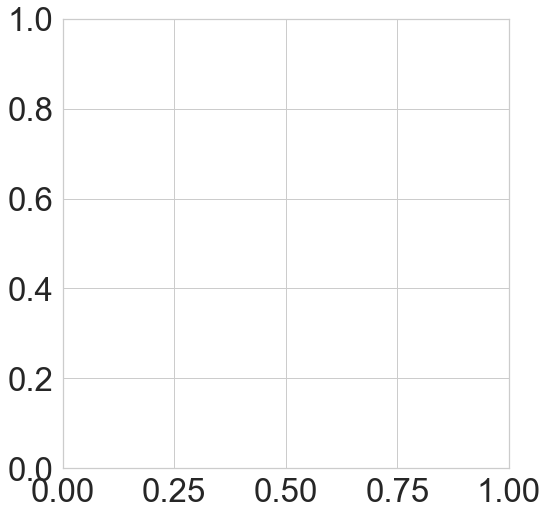

<IPython.core.display.Javascript object>

In [49]:
# standardize the data attributes
X_train_2 = preprocessing.scale(X_train)

# Create logistic regression
logistic = linear_model.LogisticRegression(
    solver="liblinear", max_iter=1000, class_weight="balanced"
)
# Create regularization penalty space
penalty = ["l1", "l2"]
# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)
# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)
# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
# Fit grid search
best_model = clf.fit(X_train / np.std(X_train, 0), Y_train)
# View best hyperparameters
print("Best Penalty:", best_model.best_estimator_.get_params()["penalty"])
print("Best C:", best_model.best_estimator_.get_params()["C"])
# Predict target vector
y_pred = best_model.predict(X_test / np.std(X_test, 0))
cm = confusion_matrix(Y_test, y_pred)
print(cm)

# m.fit(X / np.std(X, 0), y)
# print(m.coef_)
# First pass run is not awful, but courld use improvement and hyperperamter model
# optimization
print(
    "Accuracy of random forest on test set: {:.2f}".format(
        best_model.score(X_test, Y_test)
    )
)
print("Precision:", metrics.precision_score(Y_test, y_pred))
print("F1:", metrics.f1_score(Y_test, y_pred))
print("Recall:", metrics.recall_score(Y_test, y_pred))


# Best Penalty: l2 Best C: 1.0
logistic = linear_model.LogisticRegression(
    solver="liblinear", max_iter=1000, class_weight="balanced", penalty="l2"
)

logistic.fit(X_train / np.std(X_train, 0), Y_train)


# coeff_list = coeff_list.flatten
coeff_list = logistic.coef_
flat_list = [item for sublist in coeff_list for item in sublist]
print(flat_list)

data2 = {"Var": X_train.columns, "Coeff": flat_list}

coeff_df2 = pd.DataFrame(data2)


plt.subplots(figsize=(8, 8.27))

y_pos = np.arange(len(coeff_df2.Var))
# Create horizontal bars
# barlist = plt.barh(y_pos, coeff_df.Coeff)

barlist = plt.barh(y_pos, coeff_df.Var)

# Create names on the y-axis
plt.yticks(y_pos, coeff_df.Var)


# plt.suptitle('Coefficient', fontsize=14, fontweight='bold')

# Show graphic
plt.yticks(fontsize=16)
plt.xlabel("Coefficients", fontsize=18)
plt.xticks(fontsize=18)
plt.show()

NameError: name 'coeff_df' is not defined

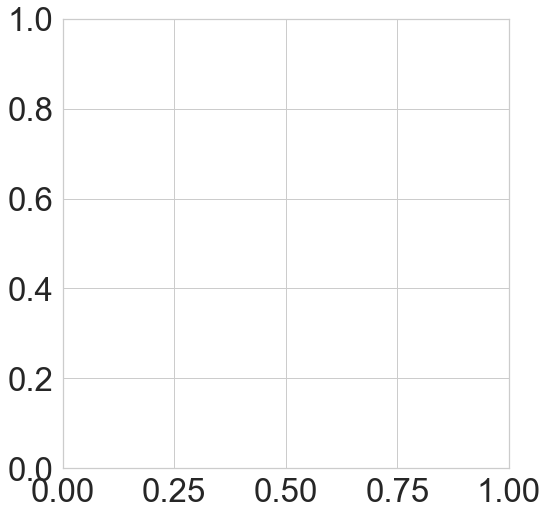

<IPython.core.display.Javascript object>

In [50]:
# coeff_df.plot(kind='bar', color=coeff_df.Coeff.apply(lambda x: 'b' if x>0 else 'y'));
# sns.set(font_scale=3)
# sns.set_style("whitegrid")
# fig, ax = plt.subplots(figsize=(8, 8.27))
# tips = sns.load_dataset("tips")
# ax = sns.boxplot(x= coeff_df.Var, y= coeff_df.Coeff)
# plt.xticks(rotation=45)

plt.subplots(figsize=(8, 8.27))

y_pos = np.arange(len(coeff_df.Var))
# Create horizontal bars
barlist = plt.barh(y_pos, coeff_df.Standardized_B)


barlist[0].set_color("r")
barlist[8].set_color("r")
barlist[9].set_color("r")
barlist[10].set_color("r")
barlist[11].set_color("r")
barlist[12].set_color("r")
barlist[13].set_color("r")
barlist[17].set_color("r")
barlist[18].set_color("r")
barlist[19].set_color("r")
barlist[21].set_color("r")
barlist[22].set_color("r")
barlist[23].set_color("r")

# Create names on the y-axis
plt.yticks(y_pos, coeff_df.Var)


# plt.suptitle('Coefficient', fontsize=14, fontweight='bold')

# Show graphic
plt.yticks(fontsize=16)
plt.xlabel("Coefficients", fontsize=18)
plt.xticks(fontsize=18)
plt.show()

In [51]:
logistic = linear_model.LogisticRegression(
    solver="liblinear", max_iter=1000, class_weight="balanced", penalty="l1"
)

logistic.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

<IPython.core.display.Javascript object>

In [286]:
import pickle
filename = 'logistic_model.sav'
pickle.dump(logistic, open(filename, 'wb'))

NameError: name 'coeff_df' is not defined

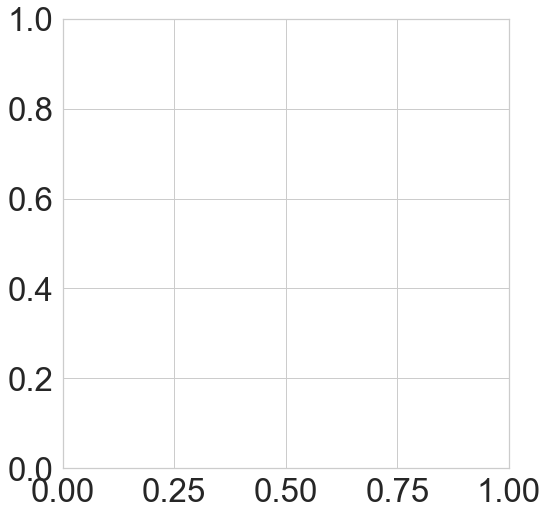

<IPython.core.display.Javascript object>

In [52]:
plt.subplots(figsize=(8, 8.27))

y_pos = np.arange(len(coeff_df.Var))
# Create horizontal bars
# barlist = plt.barh(y_pos, coeff_df.Coeff)

barlist = plt.barh(y_pos, coeff_df.Standardized_B)


barlist[1].set_color("r")
barlist[2].set_color("r")
barlist[3].set_color("r")
barlist[4].set_color("r")
barlist[7].set_color("r")
barlist[8].set_color("r")
barlist[12].set_color("r")
barlist[15].set_color("r")


# Create names on the y-axis
plt.yticks(y_pos, coeff_df.Var)


# plt.suptitle('Coefficient', fontsize=14, fontweight='bold')

# Show graphic
plt.yticks(fontsize=16)
plt.xlabel("Coefficients", fontsize=18)
plt.xticks(fontsize=18)
plt.show()

In [53]:
# The four best performers test against the test set

# The results with balanced-weighting
# SVM: 0.789121 (0.047093)
# Instantiate model with 1000 decision trees
rf = SVC(class_weight="balanced")
rf.fit(X_train, Y_train)

y_pred = rf.predict(X_test)
y_pred = pd.Series(y_pred)
# Train the model on training data
cm = confusion_matrix(Y_test, y_pred)
print(cm)

# First pass run is not awful, but courld use improvement and hyperperamter model
# optimization
print("Accuracy of random forest on test set: {:.2f}".format(rf.score(X_test, Y_test)))
print("Precision:", metrics.precision_score(Y_test, y_pred))
print("Recall:", metrics.f1_score(Y_test, y_pred))
print("F1:", metrics.recall_score(Y_test, y_pred))

[[  78 1712]
 [   8  396]]
Accuracy of random forest on test set: 0.22
Precision: 0.18785578747628084
Recall: 0.31528662420382164
F1: 0.9801980198019802


<IPython.core.display.Javascript object>

In [121]:
# Random Chance Model

from sklearn.dummy import DummyClassifier

dclf = DummyClassifier() 
dclf.fit(X_train, Y_train) 

y_pred = dclf.predict(X_test)
y_pred = pd.Series(y_pred)
# Train the model on training data
cm = confusion_matrix(Y_test, y_pred)
print(cm)

# First pass run is not awful, but courld use improvement and hyperperamter model
# optimization
print('Accuracy of random forest on test set: {:.2f}'.format(dclf.score(X_test, Y_test)))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))
print("F1:",metrics.f1_score(Y_test, y_pred))   


score = dclf.score(X_test, Y_test) 

score 


#listofzeros = [0] * (2114 + 223)
# Randomly replace value of zeroes
# 0 2114
# 1 336
#Y_test.count()

[[1828  286]
 [ 289   47]]
Accuracy of random forest on test set: 0.75
Precision: 0.14114114114114115
Recall: 0.13988095238095238
F1: 0.14050822122571005


0.7620408163265306